# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
#import tensorflow as tf

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

C:\Users\Allay\Anaconda3\envs\selfdriving\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes, counts = np.unique(y_train, return_counts=True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualizing Training Data

Training Index:  8400
Training Label:  4
Training Image: 


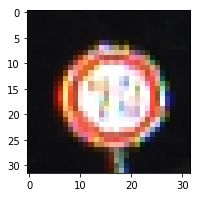

In [5]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image.reshape((32,32,3)))
print('Training Index: ', index)
print('Training Label: ',y_train[index])
print('Training Image: ')

## Training Data Distribution

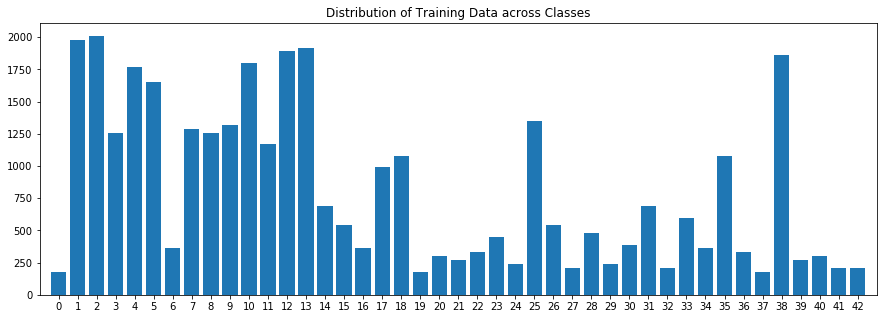

In [6]:
# Data distrbution
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, counts, tick_label=n_classes, width=0.8, align='center')
plt.title('Distribution of Training Data across Classes')
plt.show()

## Testing Data Distribution

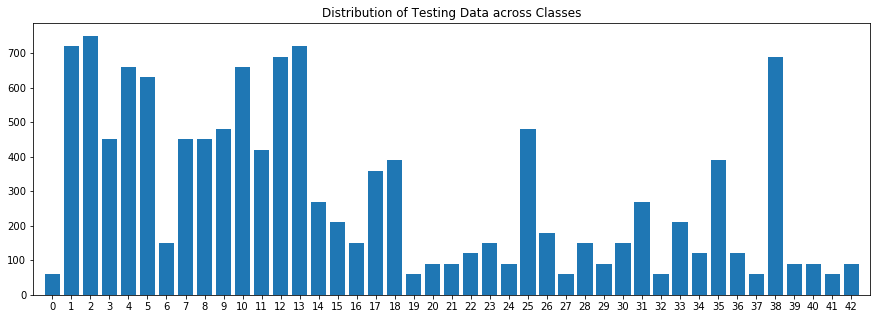

In [7]:
n_classes, counts = np.unique(y_test, return_counts=True)

plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, counts, tick_label=n_classes, width=0.8, align='center')
plt.title('Distribution of Testing Data across Classes')
plt.show()

## Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
is_features_normal = False
is_labels_encod = False

### Convert to Grayscale Image

In [9]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
train_features = np.array([rgb2gray(feature) for feature in X_train])
test_features = np.array([rgb2gray(feature) for feature in X_test])
valid_features = np.array([rgb2gray(feature) for feature in X_valid])
train_features.shape

(34799, 32, 32)

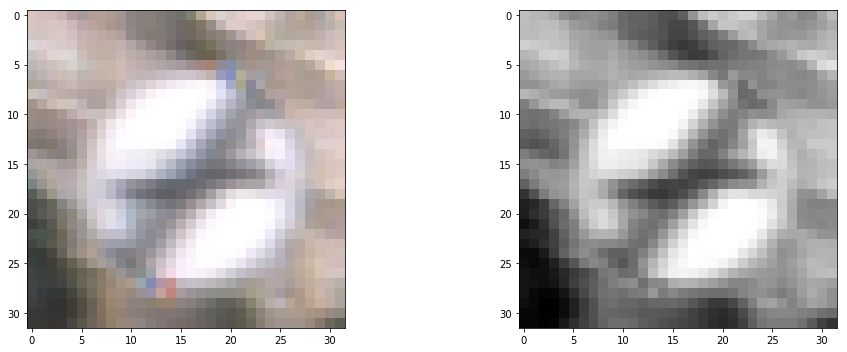

In [10]:
plt.subplot(1,2,1)
plt.imshow(X_train[50].reshape((32,32,3)))
plt.subplot(1,2,2)
plt.imshow(train_features[50], cmap= plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

## Normalize Image

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    Xmin = np.min(image_data) #0
    Xmax = np.max(image_data) #255
    a = 0.1
    b = 0.9
    #print("Xmin:", Xmin, "Xmax:", Xmax)
    return a + (((image_data-Xmin)*(b-a))/(Xmax- Xmin))

if not is_features_normal:
    train_features = normalize_grayscale(train_features)
    valid_features = normalize_grayscale(valid_features)
    test_features = normalize_grayscale(test_features)
    is_features_normal = True
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

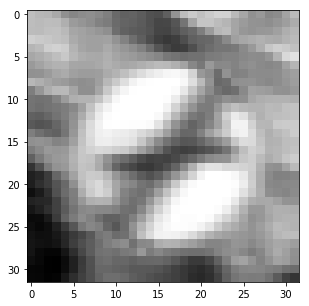

In [12]:
plt.imshow(train_features[50], cmap= plt.get_cmap('gray'))

### One Hot Encode Labels

In [13]:
from sklearn.preprocessing import LabelBinarizer
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(y_train)
    train_labels = encoder.transform(y_train)
    valid_labels = encoder.transform(y_valid)
    test_labels = encoder.transform(y_test)
    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    is_labels_encod = True

In [14]:
y_train[50], train_labels[50]

(41, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

In [15]:
### TESTING #### 
### NOT USING LABEL BINARIZER ######
# train_labels = y_train.copy()
# valid_labels = y_valid.copy()
# test_labels = y_test.copy()

### Preprocessed Data

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


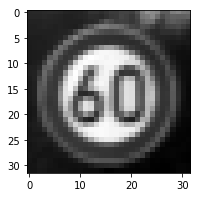

In [16]:
index = random.randint(0, len(X_train))
image = train_features[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image.reshape((32,32)),cmap='gray')
print(train_labels[index])

## MODEL PARAMETERS

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None, 43))
#one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Define and initialize model parameters 

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#import tensorflow as tf
# Store layers weight & bias
mean_wt = 0 
stanDev = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mean_wt, stddev=stanDev)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mean_wt, stddev=stanDev)),
    'fc1': tf.Variable(tf.truncated_normal(shape=(400, 200), mean=mean_wt, stddev=stanDev)),
    'fc2': tf.Variable(tf.truncated_normal(shape=(200, 100), mean=mean_wt, stddev=stanDev)),
    'out': tf.Variable(tf.truncated_normal(shape=(100, len(n_classes)), mean=mean_wt, stddev=stanDev))
}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bf1': tf.Variable(tf.zeros(200)),
    'bf2': tf.Variable(tf.zeros(100)),
    'out': tf.Variable(tf.zeros(len(n_classes)))
}

strides ={
    'conv1': [1,1,1,1],
    'maxPool1':[1,2,2,1],
    'conv2' : [1,1,1,1],
    'maxPool2':[1,2,2,1]
}

filters ={
    'maxPool1': [1,2,2,1],
    'maxPool2': [1,2,2,1]
}

### Network Architecture

In [19]:
def LeNet(x, weights, biases, strides, filters):
    x = tf.reshape(x,(-1,32,32,1))
    ### Layer 1 ###
    # convolution
    conv_layer1 = tf.nn.conv2d(x, weights['wc1'], strides=strides['conv1'],padding='VALID') + biases['bc1']
    #print(tf.shape(conv_layer1))
    # activation
    conv_layer1 = tf.nn.relu(conv_layer1)
    # pooling
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize=filters['maxPool1'],strides=strides['maxPool1'],padding='VALID')
    ### Layer 2 ###
    # convolution
    conv_layer2 = tf.nn.conv2d(conv_layer1, weights['wc2'], strides=strides['conv2'], padding='VALID') + biases['bc2']
    # activation
    conv_layer2 = tf.nn.relu(conv_layer2)
    # pooling
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=filters['maxPool2'],strides=strides['maxPool2'],padding='VALID')
    ### Layer 3 ###
    # flatten
    flatten = tf.contrib.layers.flatten(conv_layer2)
    ### Layer 4 ###
    # fully connected
    fc1 = tf.matmul(flatten, weights['fc1']) + biases['bf1']
    # activation
    fc1 = tf.nn.relu(fc1)
    ### Layer 5 ###
    # fully connected
    fc2 = tf.matmul(fc1, weights['fc2']) + biases['bf2']
    # activation
    fc2 = tf.nn.relu(fc2)
    ### Layer 6 ###
     # fully connected
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits, weights['fc1'], weights['fc2'], weights['out']

### Training pipeline

In [20]:
# Forward pass
logits, fc1_w, fc2_w, fc3_w = LeNet(x, weights, biases, strides, filters)
# Calculate loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y)
loss_operation = tf.reduce_mean(cross_entropy)
# Regularize
beta = 0.01
regularizer = tf.nn.l2_loss(fc1_w) + tf.nn.l2_loss(fc2_w) + tf.nn.l2_loss(fc3_w)
cost = tf.reduce_mean(loss_operation + beta * regularizer)

# Define loss and optimizer
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(cost)


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Model Evaluation

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [22]:
from sklearn.utils import shuffle
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [24]:
# Parameters
learning_rate = 0.001
epochs = 10
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
#n_classes = 10  # MNIST total classes (0-9 digits)
#dropout = 0.75  # Dropout, probability to keep units

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for epoch in range(epochs):
        Xtrain, ytrain = shuffle(train_features, train_labels)
        batch_count = 0
        for offset in range(0, num_examples, batch_size):
            batch_count += 1
            end = offset + batch_size
            batch_x, batch_y = Xtrain[offset:end], ytrain[offset:end]
            
            sess.run(training_operation, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 0.5})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            
            train_acc = sess.run(accuracy_operation, feed_dict={
                x: train_features,
                y: train_labels,
                keep_prob: 1.})
            
            valid_acc = sess.run(accuracy_operation, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})
            #total_accuracy += (accuracy * len(batch_x))

            print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Training Accuracy: {:.6f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch_count,
                loss,
                train_acc,
                valid_acc))
            
        
    saver.save(sess, './lenet')
    print("Model saved")
    print("Training Accuracy = ", train_acc)
    print("Validation Accuracy = ", valid_acc)
    print("Loss = ", loss)

Training...

Epoch  1, Batch   1 -Loss:     7.6940 Training Accuracy: 0.024081 Validation Accuracy: 0.040590
Epoch  1, Batch   2 -Loss:     7.6245 Training Accuracy: 0.052042 Validation Accuracy: 0.057143
Epoch  1, Batch   3 -Loss:     7.5491 Training Accuracy: 0.043622 Validation Accuracy: 0.042857
Epoch  1, Batch   4 -Loss:     7.4742 Training Accuracy: 0.043622 Validation Accuracy: 0.039456
Epoch  1, Batch   5 -Loss:     7.4025 Training Accuracy: 0.046927 Validation Accuracy: 0.047846
Epoch  1, Batch   6 -Loss:     7.3283 Training Accuracy: 0.048047 Validation Accuracy: 0.047846
Epoch  1, Batch   7 -Loss:     7.2707 Training Accuracy: 0.048565 Validation Accuracy: 0.047166
Epoch  1, Batch   8 -Loss:     7.1868 Training Accuracy: 0.048392 Validation Accuracy: 0.048073
Epoch  1, Batch   9 -Loss:     7.1318 Training Accuracy: 0.050777 Validation Accuracy: 0.052381
Epoch  1, Batch  10 -Loss:     7.0618 Training Accuracy: 0.053335 Validation Accuracy: 0.063719
Epoch  1, Batch  11 -Loss: 

Epoch  1, Batch  88 -Loss:     4.2522 Training Accuracy: 0.057128 Validation Accuracy: 0.054422
Epoch  1, Batch  89 -Loss:     4.2384 Training Accuracy: 0.069916 Validation Accuracy: 0.069161
Epoch  1, Batch  90 -Loss:     4.3117 Training Accuracy: 0.090261 Validation Accuracy: 0.087302
Epoch  1, Batch  91 -Loss:     4.2758 Training Accuracy: 0.086755 Validation Accuracy: 0.090249
Epoch  1, Batch  92 -Loss:     4.2848 Training Accuracy: 0.066611 Validation Accuracy: 0.068027
Epoch  1, Batch  93 -Loss:     4.1069 Training Accuracy: 0.057588 Validation Accuracy: 0.057143
Epoch  1, Batch  94 -Loss:     4.0991 Training Accuracy: 0.060059 Validation Accuracy: 0.062132
Epoch  1, Batch  95 -Loss:     4.1970 Training Accuracy: 0.069715 Validation Accuracy: 0.081633
Epoch  1, Batch  96 -Loss:     4.1154 Training Accuracy: 0.082876 Validation Accuracy: 0.104989
Epoch  1, Batch  97 -Loss:     4.1640 Training Accuracy: 0.088020 Validation Accuracy: 0.106576
Epoch  1, Batch  98 -Loss:     4.1255 Tr

Epoch  1, Batch 175 -Loss:     2.9415 Training Accuracy: 0.342740 Validation Accuracy: 0.313832
Epoch  1, Batch 176 -Loss:     2.7790 Training Accuracy: 0.336504 Validation Accuracy: 0.308617
Epoch  1, Batch 177 -Loss:     2.7711 Training Accuracy: 0.325268 Validation Accuracy: 0.297732
Epoch  1, Batch 178 -Loss:     2.9245 Training Accuracy: 0.313112 Validation Accuracy: 0.279819
Epoch  1, Batch 179 -Loss:     2.7053 Training Accuracy: 0.329377 Validation Accuracy: 0.309751
Epoch  1, Batch 180 -Loss:     2.9918 Training Accuracy: 0.373287 Validation Accuracy: 0.342630
Epoch  1, Batch 181 -Loss:     2.8528 Training Accuracy: 0.390643 Validation Accuracy: 0.366213
Epoch  1, Batch 182 -Loss:     2.8888 Training Accuracy: 0.383172 Validation Accuracy: 0.356916
Epoch  1, Batch 183 -Loss:     2.7259 Training Accuracy: 0.349435 Validation Accuracy: 0.313832
Epoch  1, Batch 184 -Loss:     2.7190 Training Accuracy: 0.338803 Validation Accuracy: 0.308390
Epoch  1, Batch 185 -Loss:     2.6622 Tr

Epoch  1, Batch 261 -Loss:     1.8764 Training Accuracy: 0.501537 Validation Accuracy: 0.434240
Epoch  1, Batch 262 -Loss:     2.0416 Training Accuracy: 0.515590 Validation Accuracy: 0.439683
Epoch  1, Batch 263 -Loss:     2.0466 Training Accuracy: 0.515877 Validation Accuracy: 0.445351
Epoch  1, Batch 264 -Loss:     2.1692 Training Accuracy: 0.527429 Validation Accuracy: 0.450340
Epoch  1, Batch 265 -Loss:     2.0547 Training Accuracy: 0.530044 Validation Accuracy: 0.454649
Epoch  1, Batch 266 -Loss:     2.0834 Training Accuracy: 0.524325 Validation Accuracy: 0.463039
Epoch  1, Batch 267 -Loss:     2.1941 Training Accuracy: 0.532659 Validation Accuracy: 0.469388
Epoch  1, Batch 268 -Loss:     1.9359 Training Accuracy: 0.542947 Validation Accuracy: 0.465306
Epoch  1, Batch 269 -Loss:     1.9466 Training Accuracy: 0.545418 Validation Accuracy: 0.468707
Epoch  1, Batch 270 -Loss:     1.8925 Training Accuracy: 0.542113 Validation Accuracy: 0.462812
Epoch  1, Batch 271 -Loss:     1.8936 Tr

Epoch  2, Batch  75 -Loss:     1.7800 Training Accuracy: 0.629587 Validation Accuracy: 0.572336
Epoch  2, Batch  76 -Loss:     1.7858 Training Accuracy: 0.633581 Validation Accuracy: 0.578458
Epoch  2, Batch  77 -Loss:     1.6945 Training Accuracy: 0.636915 Validation Accuracy: 0.586168
Epoch  2, Batch  78 -Loss:     2.0445 Training Accuracy: 0.632576 Validation Accuracy: 0.577098
Epoch  2, Batch  79 -Loss:     1.5590 Training Accuracy: 0.621857 Validation Accuracy: 0.554875
Epoch  2, Batch  80 -Loss:     1.4449 Training Accuracy: 0.613840 Validation Accuracy: 0.539683
Epoch  2, Batch  81 -Loss:     1.6281 Training Accuracy: 0.629386 Validation Accuracy: 0.563946
Epoch  2, Batch  82 -Loss:     1.6822 Training Accuracy: 0.642633 Validation Accuracy: 0.579365
Epoch  2, Batch  83 -Loss:     1.6803 Training Accuracy: 0.642087 Validation Accuracy: 0.584354
Epoch  2, Batch  84 -Loss:     1.8129 Training Accuracy: 0.628782 Validation Accuracy: 0.575057
Epoch  2, Batch  85 -Loss:     1.6835 Tr

Epoch  2, Batch 162 -Loss:     1.4462 Training Accuracy: 0.685853 Validation Accuracy: 0.619955
Epoch  2, Batch 163 -Loss:     1.4880 Training Accuracy: 0.696399 Validation Accuracy: 0.625850
Epoch  2, Batch 164 -Loss:     1.4476 Training Accuracy: 0.699474 Validation Accuracy: 0.627438
Epoch  2, Batch 165 -Loss:     1.3793 Training Accuracy: 0.692779 Validation Accuracy: 0.626077
Epoch  2, Batch 166 -Loss:     1.5800 Training Accuracy: 0.694187 Validation Accuracy: 0.632880
Epoch  2, Batch 167 -Loss:     1.4742 Training Accuracy: 0.695020 Validation Accuracy: 0.632653
Epoch  2, Batch 168 -Loss:     1.4378 Training Accuracy: 0.703210 Validation Accuracy: 0.641497
Epoch  2, Batch 169 -Loss:     1.5282 Training Accuracy: 0.705911 Validation Accuracy: 0.636281
Epoch  2, Batch 170 -Loss:     1.4448 Training Accuracy: 0.696715 Validation Accuracy: 0.627664
Epoch  2, Batch 171 -Loss:     1.4530 Training Accuracy: 0.703555 Validation Accuracy: 0.642177
Epoch  2, Batch 172 -Loss:     1.3276 Tr

Epoch  2, Batch 248 -Loss:     1.4787 Training Accuracy: 0.743585 Validation Accuracy: 0.688889
Epoch  2, Batch 249 -Loss:     1.4240 Training Accuracy: 0.735194 Validation Accuracy: 0.680272
Epoch  2, Batch 250 -Loss:     1.3311 Training Accuracy: 0.738383 Validation Accuracy: 0.674376
Epoch  2, Batch 251 -Loss:     1.2193 Training Accuracy: 0.739561 Validation Accuracy: 0.670295
Epoch  2, Batch 252 -Loss:     1.3873 Training Accuracy: 0.739820 Validation Accuracy: 0.666893
Epoch  2, Batch 253 -Loss:     1.3310 Training Accuracy: 0.742263 Validation Accuracy: 0.677778
Epoch  2, Batch 254 -Loss:     1.3579 Training Accuracy: 0.744131 Validation Accuracy: 0.687755
Epoch  2, Batch 255 -Loss:     1.5388 Training Accuracy: 0.741745 Validation Accuracy: 0.683900
Epoch  2, Batch 256 -Loss:     1.3546 Training Accuracy: 0.746372 Validation Accuracy: 0.698639
Epoch  2, Batch 257 -Loss:     1.3379 Training Accuracy: 0.753326 Validation Accuracy: 0.709524
Epoch  2, Batch 258 -Loss:     1.3391 Tr

Epoch  3, Batch  63 -Loss:     1.0782 Training Accuracy: 0.764591 Validation Accuracy: 0.690703
Epoch  3, Batch  64 -Loss:     1.2326 Training Accuracy: 0.761258 Validation Accuracy: 0.687755
Epoch  3, Batch  65 -Loss:     1.1472 Training Accuracy: 0.748441 Validation Accuracy: 0.680952
Epoch  3, Batch  66 -Loss:     1.3322 Training Accuracy: 0.757924 Validation Accuracy: 0.703175
Epoch  3, Batch  67 -Loss:     1.1562 Training Accuracy: 0.761315 Validation Accuracy: 0.710204
Epoch  3, Batch  68 -Loss:     1.4333 Training Accuracy: 0.775913 Validation Accuracy: 0.727664
Epoch  3, Batch  69 -Loss:     1.3383 Training Accuracy: 0.787207 Validation Accuracy: 0.740363
Epoch  3, Batch  70 -Loss:     1.1684 Training Accuracy: 0.786517 Validation Accuracy: 0.733787
Epoch  3, Batch  71 -Loss:     1.4430 Training Accuracy: 0.783385 Validation Accuracy: 0.719955
Epoch  3, Batch  72 -Loss:     1.4134 Training Accuracy: 0.777321 Validation Accuracy: 0.711565
Epoch  3, Batch  73 -Loss:     1.1191 Tr

Epoch  3, Batch 149 -Loss:     1.1707 Training Accuracy: 0.787609 Validation Accuracy: 0.726077
Epoch  3, Batch 150 -Loss:     1.1005 Training Accuracy: 0.800368 Validation Accuracy: 0.742404
Epoch  3, Batch 151 -Loss:     1.3187 Training Accuracy: 0.804104 Validation Accuracy: 0.753061
Epoch  3, Batch 152 -Loss:     1.0678 Training Accuracy: 0.800684 Validation Accuracy: 0.745578
Epoch  3, Batch 153 -Loss:     1.2431 Training Accuracy: 0.798356 Validation Accuracy: 0.739002
Epoch  3, Batch 154 -Loss:     1.2003 Training Accuracy: 0.796948 Validation Accuracy: 0.737415
Epoch  3, Batch 155 -Loss:     1.2186 Training Accuracy: 0.781689 Validation Accuracy: 0.717460
Epoch  3, Batch 156 -Loss:     1.4777 Training Accuracy: 0.773557 Validation Accuracy: 0.707483
Epoch  3, Batch 157 -Loss:     1.1237 Training Accuracy: 0.790166 Validation Accuracy: 0.722902
Epoch  3, Batch 158 -Loss:     1.3525 Training Accuracy: 0.800885 Validation Accuracy: 0.736961
Epoch  3, Batch 159 -Loss:     1.2104 Tr

Epoch  3, Batch 236 -Loss:     1.0856 Training Accuracy: 0.803414 Validation Accuracy: 0.741497
Epoch  3, Batch 237 -Loss:     1.2033 Training Accuracy: 0.793902 Validation Accuracy: 0.734694
Epoch  3, Batch 238 -Loss:     1.1664 Training Accuracy: 0.807609 Validation Accuracy: 0.746485
Epoch  3, Batch 239 -Loss:     1.0463 Training Accuracy: 0.819305 Validation Accuracy: 0.762358
Epoch  3, Batch 240 -Loss:     1.1699 Training Accuracy: 0.810655 Validation Accuracy: 0.756689
Epoch  3, Batch 241 -Loss:     1.3461 Training Accuracy: 0.808644 Validation Accuracy: 0.751020
Epoch  3, Batch 242 -Loss:     0.9811 Training Accuracy: 0.813069 Validation Accuracy: 0.747166
Epoch  3, Batch 243 -Loss:     1.1052 Training Accuracy: 0.813414 Validation Accuracy: 0.742404
Epoch  3, Batch 244 -Loss:     1.0521 Training Accuracy: 0.801805 Validation Accuracy: 0.735374
Epoch  3, Batch 245 -Loss:     1.1084 Training Accuracy: 0.794304 Validation Accuracy: 0.731293
Epoch  3, Batch 246 -Loss:     1.1326 Tr

Epoch  4, Batch  51 -Loss:     1.0613 Training Accuracy: 0.787580 Validation Accuracy: 0.735147
Epoch  4, Batch  52 -Loss:     1.0108 Training Accuracy: 0.779218 Validation Accuracy: 0.732426
Epoch  4, Batch  53 -Loss:     1.1475 Training Accuracy: 0.791603 Validation Accuracy: 0.747846
Epoch  4, Batch  54 -Loss:     1.0724 Training Accuracy: 0.827179 Validation Accuracy: 0.776871
Epoch  4, Batch  55 -Loss:     0.9587 Training Accuracy: 0.823185 Validation Accuracy: 0.757143
Epoch  4, Batch  56 -Loss:     1.0949 Training Accuracy: 0.810311 Validation Accuracy: 0.723129
Epoch  4, Batch  57 -Loss:     1.2332 Training Accuracy: 0.788902 Validation Accuracy: 0.722449
Epoch  4, Batch  58 -Loss:     1.1006 Training Accuracy: 0.787350 Validation Accuracy: 0.730839
Epoch  4, Batch  59 -Loss:     1.0931 Training Accuracy: 0.820598 Validation Accuracy: 0.772109
Epoch  4, Batch  60 -Loss:     1.0682 Training Accuracy: 0.835168 Validation Accuracy: 0.785034
Epoch  4, Batch  61 -Loss:     1.0559 Tr

Epoch  4, Batch 138 -Loss:     1.2687 Training Accuracy: 0.843415 Validation Accuracy: 0.774376
Epoch  4, Batch 139 -Loss:     1.0485 Training Accuracy: 0.839047 Validation Accuracy: 0.772562
Epoch  4, Batch 140 -Loss:     1.1002 Training Accuracy: 0.842122 Validation Accuracy: 0.777098
Epoch  4, Batch 141 -Loss:     1.1665 Training Accuracy: 0.842467 Validation Accuracy: 0.778685
Epoch  4, Batch 142 -Loss:     1.3173 Training Accuracy: 0.831260 Validation Accuracy: 0.780272
Epoch  4, Batch 143 -Loss:     1.0515 Training Accuracy: 0.826432 Validation Accuracy: 0.780045
Epoch  4, Batch 144 -Loss:     1.1221 Training Accuracy: 0.827121 Validation Accuracy: 0.771655
Epoch  4, Batch 145 -Loss:     1.0211 Training Accuracy: 0.835800 Validation Accuracy: 0.774830
Epoch  4, Batch 146 -Loss:     1.1596 Training Accuracy: 0.847294 Validation Accuracy: 0.770295
Epoch  4, Batch 147 -Loss:     1.0998 Training Accuracy: 0.840599 Validation Accuracy: 0.759637
Epoch  4, Batch 148 -Loss:     0.9850 Tr

Epoch  4, Batch 224 -Loss:     1.0008 Training Accuracy: 0.833731 Validation Accuracy: 0.769841
Epoch  4, Batch 225 -Loss:     0.9162 Training Accuracy: 0.821489 Validation Accuracy: 0.761225
Epoch  4, Batch 226 -Loss:     1.0330 Training Accuracy: 0.828817 Validation Accuracy: 0.770068
Epoch  4, Batch 227 -Loss:     0.9514 Training Accuracy: 0.845283 Validation Accuracy: 0.778685
Epoch  4, Batch 228 -Loss:     1.0153 Training Accuracy: 0.859766 Validation Accuracy: 0.791383
Epoch  4, Batch 229 -Loss:     1.0562 Training Accuracy: 0.854910 Validation Accuracy: 0.787075
Epoch  4, Batch 230 -Loss:     1.0834 Training Accuracy: 0.835599 Validation Accuracy: 0.769615
Epoch  4, Batch 231 -Loss:     0.9918 Training Accuracy: 0.829018 Validation Accuracy: 0.765986
Epoch  4, Batch 232 -Loss:     1.0153 Training Accuracy: 0.847553 Validation Accuracy: 0.780499
Epoch  4, Batch 233 -Loss:     1.0474 Training Accuracy: 0.858559 Validation Accuracy: 0.777324
Epoch  4, Batch 234 -Loss:     0.9073 Tr

Epoch  5, Batch  39 -Loss:     1.1137 Training Accuracy: 0.832122 Validation Accuracy: 0.762585
Epoch  5, Batch  40 -Loss:     0.9619 Training Accuracy: 0.844967 Validation Accuracy: 0.775510
Epoch  5, Batch  41 -Loss:     1.1216 Training Accuracy: 0.874077 Validation Accuracy: 0.800227
Epoch  5, Batch  42 -Loss:     0.9253 Training Accuracy: 0.856806 Validation Accuracy: 0.793424
Epoch  5, Batch  43 -Loss:     0.9970 Training Accuracy: 0.836949 Validation Accuracy: 0.782540
Epoch  5, Batch  44 -Loss:     0.9659 Training Accuracy: 0.832179 Validation Accuracy: 0.774376
Epoch  5, Batch  45 -Loss:     0.9922 Training Accuracy: 0.844047 Validation Accuracy: 0.787755
Epoch  5, Batch  46 -Loss:     0.9686 Training Accuracy: 0.858329 Validation Accuracy: 0.796372
Epoch  5, Batch  47 -Loss:     1.0223 Training Accuracy: 0.864709 Validation Accuracy: 0.795465
Epoch  5, Batch  48 -Loss:     0.8445 Training Accuracy: 0.864163 Validation Accuracy: 0.793197
Epoch  5, Batch  49 -Loss:     1.0637 Tr

Epoch  5, Batch 125 -Loss:     0.8094 Training Accuracy: 0.878071 Validation Accuracy: 0.804989
Epoch  5, Batch 126 -Loss:     0.8043 Training Accuracy: 0.875370 Validation Accuracy: 0.806576
Epoch  5, Batch 127 -Loss:     0.9275 Training Accuracy: 0.864709 Validation Accuracy: 0.795692
Epoch  5, Batch 128 -Loss:     0.9044 Training Accuracy: 0.868789 Validation Accuracy: 0.797959
Epoch  5, Batch 129 -Loss:     0.9009 Training Accuracy: 0.872956 Validation Accuracy: 0.793878
Epoch  5, Batch 130 -Loss:     0.9151 Training Accuracy: 0.875427 Validation Accuracy: 0.791383
Epoch  5, Batch 131 -Loss:     0.9267 Training Accuracy: 0.873445 Validation Accuracy: 0.786848
Epoch  5, Batch 132 -Loss:     1.0740 Training Accuracy: 0.870284 Validation Accuracy: 0.787528
Epoch  5, Batch 133 -Loss:     0.9817 Training Accuracy: 0.871433 Validation Accuracy: 0.787302
Epoch  5, Batch 134 -Loss:     0.9355 Training Accuracy: 0.866174 Validation Accuracy: 0.783673
Epoch  5, Batch 135 -Loss:     0.8745 Tr

Epoch  5, Batch 212 -Loss:     0.8691 Training Accuracy: 0.851116 Validation Accuracy: 0.793878
Epoch  5, Batch 213 -Loss:     0.9224 Training Accuracy: 0.863186 Validation Accuracy: 0.801361
Epoch  5, Batch 214 -Loss:     0.8084 Training Accuracy: 0.875054 Validation Accuracy: 0.812698
Epoch  5, Batch 215 -Loss:     0.8181 Training Accuracy: 0.872238 Validation Accuracy: 0.800000
Epoch  5, Batch 216 -Loss:     0.8371 Training Accuracy: 0.867784 Validation Accuracy: 0.795011
Epoch  5, Batch 217 -Loss:     0.8091 Training Accuracy: 0.872956 Validation Accuracy: 0.805215
Epoch  5, Batch 218 -Loss:     0.8542 Training Accuracy: 0.874594 Validation Accuracy: 0.813605
Epoch  5, Batch 219 -Loss:     0.9046 Training Accuracy: 0.873876 Validation Accuracy: 0.815646
Epoch  5, Batch 220 -Loss:     0.9997 Training Accuracy: 0.876951 Validation Accuracy: 0.815419
Epoch  5, Batch 221 -Loss:     1.1904 Training Accuracy: 0.886089 Validation Accuracy: 0.804308
Epoch  5, Batch 222 -Loss:     0.9223 Tr

Epoch  6, Batch  27 -Loss:     0.9696 Training Accuracy: 0.859680 Validation Accuracy: 0.764853
Epoch  6, Batch  28 -Loss:     0.8560 Training Accuracy: 0.856663 Validation Accuracy: 0.774376
Epoch  6, Batch  29 -Loss:     0.8530 Training Accuracy: 0.867467 Validation Accuracy: 0.788435
Epoch  6, Batch  30 -Loss:     1.0275 Training Accuracy: 0.881635 Validation Accuracy: 0.800000
Epoch  6, Batch  31 -Loss:     0.9287 Training Accuracy: 0.883359 Validation Accuracy: 0.799320
Epoch  6, Batch  32 -Loss:     0.9498 Training Accuracy: 0.871778 Validation Accuracy: 0.791156
Epoch  6, Batch  33 -Loss:     0.9327 Training Accuracy: 0.872439 Validation Accuracy: 0.783673
Epoch  6, Batch  34 -Loss:     0.9397 Training Accuracy: 0.880341 Validation Accuracy: 0.797279
Epoch  6, Batch  35 -Loss:     0.8470 Training Accuracy: 0.883876 Validation Accuracy: 0.808390
Epoch  6, Batch  36 -Loss:     0.8835 Training Accuracy: 0.871117 Validation Accuracy: 0.809977
Epoch  6, Batch  37 -Loss:     0.8950 Tr

Epoch  6, Batch 113 -Loss:     0.8438 Training Accuracy: 0.890198 Validation Accuracy: 0.804762
Epoch  6, Batch 114 -Loss:     0.7529 Training Accuracy: 0.890342 Validation Accuracy: 0.805669
Epoch  6, Batch 115 -Loss:     0.8409 Training Accuracy: 0.886002 Validation Accuracy: 0.809297
Epoch  6, Batch 116 -Loss:     0.8244 Training Accuracy: 0.884106 Validation Accuracy: 0.808844
Epoch  6, Batch 117 -Loss:     0.7226 Training Accuracy: 0.883186 Validation Accuracy: 0.809977
Epoch  6, Batch 118 -Loss:     0.9057 Training Accuracy: 0.874680 Validation Accuracy: 0.804535
Epoch  6, Batch 119 -Loss:     0.8596 Training Accuracy: 0.867094 Validation Accuracy: 0.800227
Epoch  6, Batch 120 -Loss:     0.8751 Training Accuracy: 0.882985 Validation Accuracy: 0.812925
Epoch  6, Batch 121 -Loss:     0.9533 Training Accuracy: 0.890370 Validation Accuracy: 0.814286
Epoch  6, Batch 122 -Loss:     0.9014 Training Accuracy: 0.879249 Validation Accuracy: 0.808390
Epoch  6, Batch 123 -Loss:     0.8249 Tr

Epoch  6, Batch 200 -Loss:     0.8213 Training Accuracy: 0.881692 Validation Accuracy: 0.805669
Epoch  6, Batch 201 -Loss:     0.7863 Training Accuracy: 0.897440 Validation Accuracy: 0.808390
Epoch  6, Batch 202 -Loss:     0.8262 Training Accuracy: 0.889566 Validation Accuracy: 0.808390
Epoch  6, Batch 203 -Loss:     0.7815 Training Accuracy: 0.877267 Validation Accuracy: 0.800454
Epoch  6, Batch 204 -Loss:     0.7497 Training Accuracy: 0.881089 Validation Accuracy: 0.807483
Epoch  6, Batch 205 -Loss:     0.7632 Training Accuracy: 0.890342 Validation Accuracy: 0.815193
Epoch  6, Batch 206 -Loss:     0.8484 Training Accuracy: 0.898991 Validation Accuracy: 0.823129
Epoch  6, Batch 207 -Loss:     0.9195 Training Accuracy: 0.902497 Validation Accuracy: 0.827211
Epoch  6, Batch 208 -Loss:     0.9234 Training Accuracy: 0.899652 Validation Accuracy: 0.821995
Epoch  6, Batch 209 -Loss:     0.8694 Training Accuracy: 0.891347 Validation Accuracy: 0.808844
Epoch  6, Batch 210 -Loss:     0.8650 Tr

Epoch  7, Batch  15 -Loss:     0.8037 Training Accuracy: 0.901865 Validation Accuracy: 0.834921
Epoch  7, Batch  16 -Loss:     0.7835 Training Accuracy: 0.908790 Validation Accuracy: 0.833333
Epoch  7, Batch  17 -Loss:     0.8741 Training Accuracy: 0.906348 Validation Accuracy: 0.820635
Epoch  7, Batch  18 -Loss:     0.8968 Training Accuracy: 0.893962 Validation Accuracy: 0.810884
Epoch  7, Batch  19 -Loss:     0.9165 Training Accuracy: 0.890112 Validation Accuracy: 0.807710
Epoch  7, Batch  20 -Loss:     0.8759 Training Accuracy: 0.898302 Validation Accuracy: 0.818594
Epoch  7, Batch  21 -Loss:     0.7966 Training Accuracy: 0.894767 Validation Accuracy: 0.810431
Epoch  7, Batch  22 -Loss:     0.8246 Training Accuracy: 0.887353 Validation Accuracy: 0.805896
Epoch  7, Batch  23 -Loss:     0.8416 Training Accuracy: 0.902124 Validation Accuracy: 0.821542
Epoch  7, Batch  24 -Loss:     0.8789 Training Accuracy: 0.908388 Validation Accuracy: 0.834921
Epoch  7, Batch  25 -Loss:     0.8662 Tr

Epoch  7, Batch 101 -Loss:     0.6938 Training Accuracy: 0.905026 Validation Accuracy: 0.819048
Epoch  7, Batch 102 -Loss:     0.7720 Training Accuracy: 0.906377 Validation Accuracy: 0.817460
Epoch  7, Batch 103 -Loss:     0.8462 Training Accuracy: 0.904825 Validation Accuracy: 0.817914
Epoch  7, Batch 104 -Loss:     0.7338 Training Accuracy: 0.901434 Validation Accuracy: 0.824036
Epoch  7, Batch 105 -Loss:     0.8504 Training Accuracy: 0.903589 Validation Accuracy: 0.826984
Epoch  7, Batch 106 -Loss:     0.7581 Training Accuracy: 0.907038 Validation Accuracy: 0.831066
Epoch  7, Batch 107 -Loss:     0.8044 Training Accuracy: 0.895457 Validation Accuracy: 0.826304
Epoch  7, Batch 108 -Loss:     0.8407 Training Accuracy: 0.894451 Validation Accuracy: 0.825850
Epoch  7, Batch 109 -Loss:     0.8253 Training Accuracy: 0.904423 Validation Accuracy: 0.835828
Epoch  7, Batch 110 -Loss:     0.6360 Training Accuracy: 0.912440 Validation Accuracy: 0.834921
Epoch  7, Batch 111 -Loss:     0.6897 Tr

Epoch  7, Batch 188 -Loss:     0.9201 Training Accuracy: 0.917469 Validation Accuracy: 0.843311
Epoch  7, Batch 189 -Loss:     0.7703 Training Accuracy: 0.912756 Validation Accuracy: 0.849206
Epoch  7, Batch 190 -Loss:     0.7985 Training Accuracy: 0.906549 Validation Accuracy: 0.847846
Epoch  7, Batch 191 -Loss:     0.7458 Training Accuracy: 0.898330 Validation Accuracy: 0.839456
Epoch  7, Batch 192 -Loss:     0.8383 Training Accuracy: 0.904652 Validation Accuracy: 0.843537
Epoch  7, Batch 193 -Loss:     0.7518 Training Accuracy: 0.902382 Validation Accuracy: 0.837188
Epoch  7, Batch 194 -Loss:     0.7480 Training Accuracy: 0.903877 Validation Accuracy: 0.839229
Epoch  7, Batch 195 -Loss:     0.7138 Training Accuracy: 0.906664 Validation Accuracy: 0.842404
Epoch  7, Batch 196 -Loss:     0.7908 Training Accuracy: 0.905198 Validation Accuracy: 0.835147
Epoch  7, Batch 197 -Loss:     0.8090 Training Accuracy: 0.896290 Validation Accuracy: 0.819501
Epoch  7, Batch 198 -Loss:     0.8934 Tr

Epoch  8, Batch   3 -Loss:     0.8734 Training Accuracy: 0.908704 Validation Accuracy: 0.835828
Epoch  8, Batch   4 -Loss:     0.7450 Training Accuracy: 0.904451 Validation Accuracy: 0.832426
Epoch  8, Batch   5 -Loss:     0.7661 Training Accuracy: 0.901147 Validation Accuracy: 0.831746
Epoch  8, Batch   6 -Loss:     0.7549 Training Accuracy: 0.898330 Validation Accuracy: 0.818141
Epoch  8, Batch   7 -Loss:     0.7646 Training Accuracy: 0.898474 Validation Accuracy: 0.819274
Epoch  8, Batch   8 -Loss:     0.7857 Training Accuracy: 0.904624 Validation Accuracy: 0.818141
Epoch  8, Batch   9 -Loss:     0.6984 Training Accuracy: 0.909049 Validation Accuracy: 0.826077
Epoch  8, Batch  10 -Loss:     0.7071 Training Accuracy: 0.904796 Validation Accuracy: 0.825850
Epoch  8, Batch  11 -Loss:     0.8005 Training Accuracy: 0.907497 Validation Accuracy: 0.828798
Epoch  8, Batch  12 -Loss:     0.7147 Training Accuracy: 0.917383 Validation Accuracy: 0.842177
Epoch  8, Batch  13 -Loss:     0.6158 Tr

Epoch  8, Batch  90 -Loss:     0.7800 Training Accuracy: 0.915860 Validation Accuracy: 0.824036
Epoch  8, Batch  91 -Loss:     0.6950 Training Accuracy: 0.910601 Validation Accuracy: 0.824036
Epoch  8, Batch  92 -Loss:     0.7244 Training Accuracy: 0.900342 Validation Accuracy: 0.813152
Epoch  8, Batch  93 -Loss:     0.7111 Training Accuracy: 0.907411 Validation Accuracy: 0.823129
Epoch  8, Batch  94 -Loss:     0.6751 Training Accuracy: 0.919337 Validation Accuracy: 0.829478
Epoch  8, Batch  95 -Loss:     0.8298 Training Accuracy: 0.914279 Validation Accuracy: 0.830839
Epoch  8, Batch  96 -Loss:     0.6783 Training Accuracy: 0.912641 Validation Accuracy: 0.832880
Epoch  8, Batch  97 -Loss:     0.7170 Training Accuracy: 0.912296 Validation Accuracy: 0.827891
Epoch  8, Batch  98 -Loss:     0.6891 Training Accuracy: 0.914423 Validation Accuracy: 0.828571
Epoch  8, Batch  99 -Loss:     0.6880 Training Accuracy: 0.913072 Validation Accuracy: 0.829705
Epoch  8, Batch 100 -Loss:     0.7293 Tr

Epoch  8, Batch 177 -Loss:     0.6768 Training Accuracy: 0.904566 Validation Accuracy: 0.809751
Epoch  8, Batch 178 -Loss:     0.7638 Training Accuracy: 0.910342 Validation Accuracy: 0.827438
Epoch  8, Batch 179 -Loss:     0.7350 Training Accuracy: 0.903359 Validation Accuracy: 0.830159
Epoch  8, Batch 180 -Loss:     0.7609 Training Accuracy: 0.897181 Validation Accuracy: 0.819501
Epoch  8, Batch 181 -Loss:     0.7059 Training Accuracy: 0.898819 Validation Accuracy: 0.820635
Epoch  8, Batch 182 -Loss:     0.7238 Training Accuracy: 0.909222 Validation Accuracy: 0.817914
Epoch  8, Batch 183 -Loss:     0.9306 Training Accuracy: 0.914567 Validation Accuracy: 0.814286
Epoch  8, Batch 184 -Loss:     0.7161 Training Accuracy: 0.920285 Validation Accuracy: 0.816780
Epoch  8, Batch 185 -Loss:     0.6764 Training Accuracy: 0.920400 Validation Accuracy: 0.819955
Epoch  8, Batch 186 -Loss:     0.7844 Training Accuracy: 0.919480 Validation Accuracy: 0.828571
Epoch  8, Batch 187 -Loss:     0.7829 Tr

Epoch  8, Batch 264 -Loss:     0.6156 Training Accuracy: 0.916636 Validation Accuracy: 0.835374
Epoch  8, Batch 265 -Loss:     0.7841 Training Accuracy: 0.924366 Validation Accuracy: 0.846485
Epoch  8, Batch 266 -Loss:     0.8385 Training Accuracy: 0.917986 Validation Accuracy: 0.838322
Epoch  8, Batch 267 -Loss:     0.5820 Training Accuracy: 0.902813 Validation Accuracy: 0.813832
Epoch  8, Batch 268 -Loss:     0.6702 Training Accuracy: 0.896405 Validation Accuracy: 0.801587
Epoch  8, Batch 269 -Loss:     0.7273 Training Accuracy: 0.891118 Validation Accuracy: 0.799546
Epoch  8, Batch 270 -Loss:     0.6969 Training Accuracy: 0.916147 Validation Accuracy: 0.834921
Epoch  8, Batch 271 -Loss:     0.6591 Training Accuracy: 0.919883 Validation Accuracy: 0.837188
Epoch  8, Batch 272 -Loss:     0.8154 Training Accuracy: 0.905342 Validation Accuracy: 0.822903
Epoch  9, Batch   1 -Loss:     0.7172 Training Accuracy: 0.897440 Validation Accuracy: 0.817234
Epoch  9, Batch   2 -Loss:     0.7433 Tr

Epoch  9, Batch  78 -Loss:     0.6386 Training Accuracy: 0.922584 Validation Accuracy: 0.845351
Epoch  9, Batch  79 -Loss:     0.7606 Training Accuracy: 0.926521 Validation Accuracy: 0.849660
Epoch  9, Batch  80 -Loss:     0.7008 Training Accuracy: 0.931349 Validation Accuracy: 0.854649
Epoch  9, Batch  81 -Loss:     0.8291 Training Accuracy: 0.933992 Validation Accuracy: 0.859864
Epoch  9, Batch  82 -Loss:     0.6711 Training Accuracy: 0.931579 Validation Accuracy: 0.865986
Epoch  9, Batch  83 -Loss:     0.6425 Training Accuracy: 0.924596 Validation Accuracy: 0.859864
Epoch  9, Batch  84 -Loss:     0.7737 Training Accuracy: 0.921492 Validation Accuracy: 0.852154
Epoch  9, Batch  85 -Loss:     0.6067 Training Accuracy: 0.920400 Validation Accuracy: 0.841497
Epoch  9, Batch  86 -Loss:     0.6500 Training Accuracy: 0.929251 Validation Accuracy: 0.846032
Epoch  9, Batch  87 -Loss:     0.7453 Training Accuracy: 0.933418 Validation Accuracy: 0.848753
Epoch  9, Batch  88 -Loss:     0.6672 Tr

Epoch  9, Batch 164 -Loss:     0.6354 Training Accuracy: 0.926291 Validation Accuracy: 0.841270
Epoch  9, Batch 165 -Loss:     0.7125 Training Accuracy: 0.927900 Validation Accuracy: 0.843311
Epoch  9, Batch 166 -Loss:     0.7097 Training Accuracy: 0.926004 Validation Accuracy: 0.837642
Epoch  9, Batch 167 -Loss:     0.7647 Training Accuracy: 0.925831 Validation Accuracy: 0.842177
Epoch  9, Batch 168 -Loss:     0.6688 Training Accuracy: 0.929567 Validation Accuracy: 0.847166
Epoch  9, Batch 169 -Loss:     0.6329 Training Accuracy: 0.925113 Validation Accuracy: 0.845805
Epoch  9, Batch 170 -Loss:     0.6591 Training Accuracy: 0.917009 Validation Accuracy: 0.841497
Epoch  9, Batch 171 -Loss:     0.7822 Training Accuracy: 0.918705 Validation Accuracy: 0.846032
Epoch  9, Batch 172 -Loss:     0.7470 Training Accuracy: 0.926751 Validation Accuracy: 0.847619
Epoch  9, Batch 173 -Loss:     0.7410 Training Accuracy: 0.927986 Validation Accuracy: 0.845578
Epoch  9, Batch 174 -Loss:     0.7253 Tr

Epoch  9, Batch 250 -Loss:     0.7369 Training Accuracy: 0.927325 Validation Accuracy: 0.849660
Epoch  9, Batch 251 -Loss:     0.7151 Training Accuracy: 0.922958 Validation Accuracy: 0.839229
Epoch  9, Batch 252 -Loss:     0.7524 Training Accuracy: 0.917785 Validation Accuracy: 0.831973
Epoch  9, Batch 253 -Loss:     0.6339 Training Accuracy: 0.917526 Validation Accuracy: 0.830386
Epoch  9, Batch 254 -Loss:     0.6599 Training Accuracy: 0.920026 Validation Accuracy: 0.829932
Epoch  9, Batch 255 -Loss:     0.7990 Training Accuracy: 0.926550 Validation Accuracy: 0.831519
Epoch  9, Batch 256 -Loss:     0.7086 Training Accuracy: 0.924050 Validation Accuracy: 0.827664
Epoch  9, Batch 257 -Loss:     0.6392 Training Accuracy: 0.919854 Validation Accuracy: 0.822222
Epoch  9, Batch 258 -Loss:     0.6259 Training Accuracy: 0.912497 Validation Accuracy: 0.822449
Epoch  9, Batch 259 -Loss:     0.6322 Training Accuracy: 0.914681 Validation Accuracy: 0.825850
Epoch  9, Batch 260 -Loss:     0.6892 Tr

Epoch 10, Batch  65 -Loss:     0.7381 Training Accuracy: 0.915055 Validation Accuracy: 0.828345
Epoch 10, Batch  66 -Loss:     0.6009 Training Accuracy: 0.906463 Validation Accuracy: 0.819728
Epoch 10, Batch  67 -Loss:     0.6010 Training Accuracy: 0.909681 Validation Accuracy: 0.824263
Epoch 10, Batch  68 -Loss:     0.5346 Training Accuracy: 0.922613 Validation Accuracy: 0.837868
Epoch 10, Batch  69 -Loss:     0.6094 Training Accuracy: 0.928590 Validation Accuracy: 0.843991
Epoch 10, Batch  70 -Loss:     0.6930 Training Accuracy: 0.926061 Validation Accuracy: 0.839456
Epoch 10, Batch  71 -Loss:     0.7078 Training Accuracy: 0.921032 Validation Accuracy: 0.837868
Epoch 10, Batch  72 -Loss:     0.7800 Training Accuracy: 0.922843 Validation Accuracy: 0.840816
Epoch 10, Batch  73 -Loss:     0.6342 Training Accuracy: 0.929567 Validation Accuracy: 0.846485
Epoch 10, Batch  74 -Loss:     0.6636 Training Accuracy: 0.929682 Validation Accuracy: 0.843311
Epoch 10, Batch  75 -Loss:     0.6474 Tr

Epoch 10, Batch 151 -Loss:     0.6812 Training Accuracy: 0.920486 Validation Accuracy: 0.815873
Epoch 10, Batch 152 -Loss:     0.7795 Training Accuracy: 0.928619 Validation Accuracy: 0.821542
Epoch 10, Batch 153 -Loss:     0.6746 Training Accuracy: 0.930429 Validation Accuracy: 0.831973
Epoch 10, Batch 154 -Loss:     0.6147 Training Accuracy: 0.926521 Validation Accuracy: 0.840590
Epoch 10, Batch 155 -Loss:     0.7507 Training Accuracy: 0.934193 Validation Accuracy: 0.851247
Epoch 10, Batch 156 -Loss:     0.6234 Training Accuracy: 0.940630 Validation Accuracy: 0.860998
Epoch 10, Batch 157 -Loss:     0.7484 Training Accuracy: 0.939021 Validation Accuracy: 0.863492
Epoch 10, Batch 158 -Loss:     0.7687 Training Accuracy: 0.925256 Validation Accuracy: 0.856463
Epoch 10, Batch 159 -Loss:     0.6937 Training Accuracy: 0.914739 Validation Accuracy: 0.841723
Epoch 10, Batch 160 -Loss:     0.6914 Training Accuracy: 0.916118 Validation Accuracy: 0.841950
Epoch 10, Batch 161 -Loss:     0.5966 Tr

Epoch 10, Batch 237 -Loss:     0.6317 Training Accuracy: 0.935544 Validation Accuracy: 0.858503
Epoch 10, Batch 238 -Loss:     0.6687 Training Accuracy: 0.933331 Validation Accuracy: 0.858957
Epoch 10, Batch 239 -Loss:     0.5930 Training Accuracy: 0.931377 Validation Accuracy: 0.858277
Epoch 10, Batch 240 -Loss:     0.6617 Training Accuracy: 0.934222 Validation Accuracy: 0.865986
Epoch 10, Batch 241 -Loss:     0.5775 Training Accuracy: 0.939079 Validation Accuracy: 0.876871
Epoch 10, Batch 242 -Loss:     0.6745 Training Accuracy: 0.935314 Validation Accuracy: 0.874376
Epoch 10, Batch 243 -Loss:     0.6473 Training Accuracy: 0.928159 Validation Accuracy: 0.867800
Epoch 10, Batch 244 -Loss:     0.8079 Training Accuracy: 0.934538 Validation Accuracy: 0.873469
Epoch 10, Batch 245 -Loss:     0.5528 Training Accuracy: 0.937642 Validation Accuracy: 0.872562
Epoch 10, Batch 246 -Loss:     0.5547 Training Accuracy: 0.936061 Validation Accuracy: 0.864399
Epoch 10, Batch 247 -Loss:     0.5828 Tr

In [26]:
# Calculate Test Accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_acc = sess.run(accuracy_operation, feed_dict={
        x: test_features,
        y: test_labels,
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

INFO:tensorflow:Restoring parameters from .\lenet
Testing Accuracy: 0.847585141658783


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Load new Images

In [27]:
### Load the images and plot them here.
import os, os.path
from PIL import Image

imgs = []
path = './test-data/'
valid_images = [".jpg",".png"]
for filename in os.listdir(path):
    ext = os.path.splitext(filename)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(np.asarray(Image.open(os.path.join(path,filename)).resize((32,32))))

In [28]:
imgs[0].shape,imgs[1].shape,imgs[2].shape,imgs[3].shape,imgs[4].shape

((32, 32, 3), (32, 32, 3), (32, 32, 3), (32, 32, 3), (32, 32, 3))

In [29]:
import csv
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_labels = {}
    for row in reader:
        sign_index, sign_name = row
        sign_labels[sign_index] = sign_name

In [30]:
imgs_labels = [17, 25, 1, 14, 13] 
imgs_labels = [sign_labels[str(label)] for label in imgs_labels]
imgs_labels

['No entry', 'Road work', 'Speed limit (30km/h)', 'Stop', 'Yield']

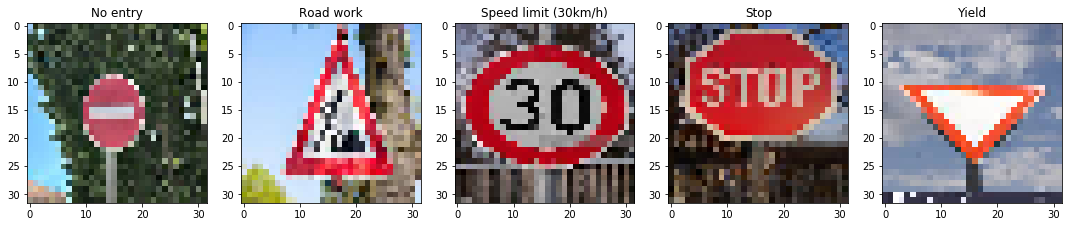

In [31]:
# Display the images
plt.rcParams["figure.figsize"] = [15, 5]

for i in range(len(imgs)):
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(imgs[i])
    plt.title(imgs_labels[i])

plt.tight_layout()
plt.show()

Reshape and preprocess images

In [34]:
#reshape
imgs_pre = rgb2gray(np.array(imgs))
imgs_pre = normalize_grayscale(imgs_pre)

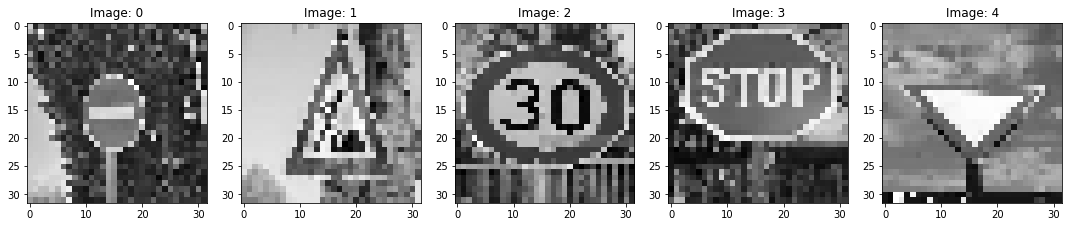

In [36]:
# Display the images
plt.rcParams["figure.figsize"] = [15, 5]

for i in range(len(imgs_pre)):
    plt.subplot(1, len(imgs_pre), i+1)
    plt.imshow(imgs_pre[i].reshape(32,32), cmap="gray")
    plt.title('Image: %d' % i)

plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    result_logits = sess.run(logits, feed_dict={x: np.array(imgs_pre), keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from .\lenet


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
result_logits.shape

(5, 43)

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# result_softmax = (5, 43)
# result_top_k = (2, 5, 5)

with tf.Session() as sess:
    result_softmax = sess.run(tf.nn.softmax(result_logits))
    result_top_k = sess.run(tf.nn.top_k(result_softmax , k= 5, sorted=True))

result_final = []
for i in range(len(imgs)):
    print('Image', i, 'probabilities:', result_top_k[0][i], '\n and predicted classes:', result_top_k[1][i])
    result_labels = [sign_labels[str(pred)] for pred in result_top_k[1][i]]
    print('Predicted labels: [', result_labels[0], ",", result_labels[1],",", result_labels[2],",", result_labels[3],",", result_labels[4],"]")
    result_final.append(result_top_k[1][i][0])
    
#result_final = [Sign_labelresult_final]

Image 0 probabilities: [0.72783166 0.20286584 0.02022686 0.0132523  0.00938945] 
 and predicted classes: [13 15  9 36 14]
Predicted labels: [ Yield , No vehicles , No passing , Go straight or right , Stop ]
Image 1 probabilities: [9.9711812e-01 5.7670800e-04 5.6804379e-04 4.6697137e-04 3.4418423e-04] 
 and predicted classes: [25 29 33  9 19]
Predicted labels: [ Road work , Bicycles crossing , Turn right ahead , No passing , Dangerous curve to the left ]
Image 2 probabilities: [0.66351396 0.21605551 0.09717923 0.0081927  0.00712923] 
 and predicted classes: [ 1  2 40 31  0]
Predicted labels: [ Speed limit (30km/h) , Speed limit (50km/h) , Roundabout mandatory , Wild animals crossing , Speed limit (20km/h) ]
Image 3 probabilities: [0.9488917  0.01577515 0.01502223 0.00495115 0.00298798] 
 and predicted classes: [ 9 12 33 19 10]
Predicted labels: [ No passing , Priority road , Turn right ahead , Dangerous curve to the left , No passing for vehicles over 3.5 metric tons ]
Image 4 probabili

### Analyze Performance

In [40]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('Expected Result: ', imgs_labels)
result_final_labels = [sign_labels[str(result)] for result in result_final]
print('Predicted Result: ', result_final_labels)
count = 0
for i in range(len(result_final)):
    if result_final_labels[i] == imgs_labels[i]:
        count = count + 1
print("Accuracy of prediction = %", (count/len(imgs_labels))*100)        


Expected Result:  ['No entry', 'Road work', 'Speed limit (30km/h)', 'Stop', 'Yield']
Predicted Result:  ['Yield', 'Road work', 'Speed limit (30km/h)', 'No passing', 'Yield']
Accuracy of prediction = % 60.0


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [37]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")